In [424]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

pd.set_option('display.max_rows', 10)

In [488]:
#Location of files
filepath = '/Users/vano/Dropbox/raid/rmjoc2/%s.csv'
location = 'nrni/NRNI_Flows_1929-2008_Corrected_08-2016'
filepath%location 

location2 = 'bcsd/CCSM4_rcp85_BCSD_VIC_P1-LIB-biascorrected_streamflow-provisional_0.3'
filepath%location2 

#eventually set up to do path elsewhere:
#hydra:/raid3/oriana/bpa/future/VIC/calib_inverse/bcsd/{GCM}/{RCP}/deliverables/

'/Users/vano/Dropbox/raid/rmjoc2/bcsd/CCSM4_rcp85_BCSD_VIC_P1-LIB-biascorrected_streamflow-provisional_0.3.csv'

In [489]:
df = pd.read_csv(filepath%(location), skiprows=range(1, 7), usecols=range(1,199))
nrni=df['LIB5N']

df2 = pd.read_csv(filepath%(location2), comment='#', index_col=0, parse_dates=True) 
fut=df2['biascorrected_streamflow']
df2.head()

,biascorrected_streamflow
date,
1950-01-01,1759.640
1950-01-02,2819.746
1950-01-03,2719.094
1950-01-04,3105.675
1950-01-05,2613.186


In [420]:
!head -n 4 '/Users/vano/Dropbox/raid/rmjoc2/bcsd/CCSM4_rcp85_BCSD_VIC_P1-LIB-biascorrected_streamflow-provisional_0.3.csv'

# dataset_title : BPA TIP 304: Predicting the Hydrologic Response of the Columbia River System to Climate Change
# dataset_version : provisional_0.3
# dataset_restrictions : Provisional data: Not for distribution beyond RMJOC. To be used for evaluation purposes only. Not valid after June 30, 2016 or the release of the next version, whichever is earlier.
# dataset_contact : Bart Nijssen, nijssen@uw.edu, UW Hydro | Computational Hydrology, http://www.hydro.washington.edu


In [492]:
#note: nrni dataset had funny date assignment, since only have to read in once, manually assigning them
rng = pd.date_range('07/1/1928', periods=29312, freq='D')
ts = pd.Series(nrni.values, index=rng)  
ts = ts.astype(np.float)
ts

1928-07-01    37013
1928-07-02    40506
1928-07-03    41185
1928-07-04    39827
1928-07-05    38371
              ...  
2008-09-26     6601
2008-09-27     5310
2008-09-28     6172
2008-09-29     5955
2008-09-30     5088
Freq: D, dtype: float64

In [428]:
ts.describe()
ts.dtype

dtype('float64')

In [ ]:
class Series(object):
    
    ...
    
    def plot(self, *args):
        
        plt.plot(self.index, self.values, *args)

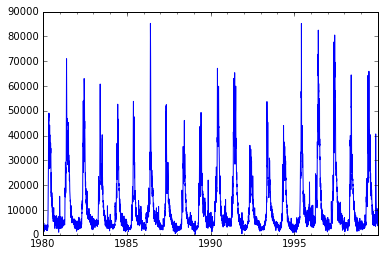

In [430]:
ts['1980':'1999'].plot()

In [439]:
# helper functions for finding day of water year and water year

def water_day(indate):
    doy = indate.timetuple().tm_yday
    if doy >= 274:
        outdate = doy - 274
    else:
        outdate = doy + 91
    return outdate

def water_year(year, month):
    if month > 9:
        return year + 1
    return year

(0, 366)

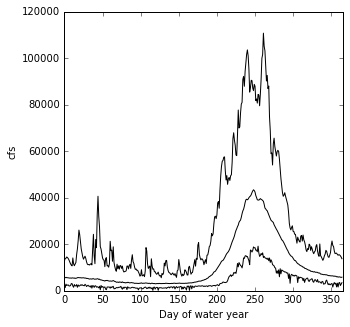

In [431]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ts.groupby(lambda x:water_day(x)).mean().plot(style='k-', ax=ax)
ts.groupby(lambda x:water_day(x)).min().plot(style='k-', ax=ax)
ts.groupby(lambda x:water_day(x)).max().plot(style='k-', ax=ax)
ax.set_ylabel('cfs')
ax.set_xlabel('Day of water year')
plt.xlim((0,366))

In [442]:
tdf = ts.to_frame('streamflow')
tdf['wyear'] = [water_year(i.year, i.month) for i in tdf.index]
tdf['doy'] = [water_day(i) for i in tdf.index]
tdf

,streamflow,wyear,doy
1928-07-01,37013,1928,274
1928-07-02,40506,1928,275
1928-07-03,41185,1928,276
1928-07-04,39827,1928,277
1928-07-05,38371,1928,278
...,...,...,...
2008-09-26,6601,2008,361
2008-09-27,5310,2008,362
2008-09-28,6172,2008,363
2008-09-29,5955,2008,364


In [454]:
twy = pd.pivot_table(tdf, index='doy', columns='wyear')['streamflow']

In [455]:
twy

wyear,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
doy,,,,,,,,,,,,,,,,,,,,,
0,4102,NaN,3582,4185,4173,NaN,8143,3805,3794.5,NaN,...,6918,5751,NaN,3090,4688,6495,NaN,12906,4081,4520
1,NaN,4010,3582,4168,3671,4312,8040,3789,4076.0,3211,...,1390,3673,5979,1859,4255,3543,7366,13915,4823,4595
2,NaN,4010,3582,4133,3628,4312,7920,3815,3997.0,3235,...,5011,4583,5147,3100,4261,3125,8258,13854,4829,5649
3,NaN,4257,3582,4099,3527,4245,8092,3789,3997.0,3302,...,3746,5718,5147,2278,5338,3968,7818,10467,3767,6493
4,NaN,4257,3582,4168,3517,4245,8281,3704,3935.0,3312,...,4591,5273,5563,3100,4473,3235,7046,9189,4189,3541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,4351,4525,4822,4113,4874,7569,4339,4595,3609.0,4291,...,7000,5578,4537,4679,4928,11345,6812,5546,3851,5743
361,4351,4237,4822,3995,4802,7517,4238,4459,3623.0,4213,...,5525,4948,4123,3590,3878,11791,8665,4167,4280,6601
362,4351,4237,4668,3928,4730,7449,4137,4393,3561.0,4195,...,5660,5365,2266,3380,4514,9562,2938,4553,4275,5310


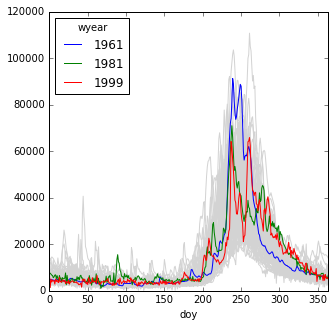

In [457]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

special_years = [1961, 1981, 1999]

twy.plot(c='lightgray', legend=False, ax=ax)

twy[special_years].plot(legend=True, ax=ax)



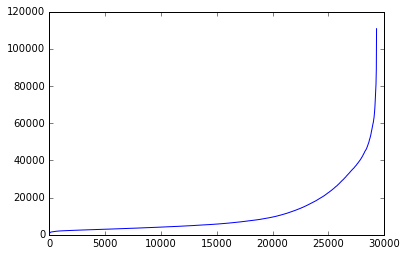

In [462]:
#flow duration curve, work in progress
x = df.sort_values(by="LIB5N")
dailysort=x['LIB5N']
dailysort[1:]
plt.plot(dailysort[1:].values)  
#dailysort[1:].plot.line()

In [408]:
x = ts.resample('M', how='sum')
x

,0
1928-07-31,769629
...,...
2008-09-30,180191


In [466]:
def apr_thr_aug(m):
    if (m >= 4) and (m <= 8):
        return True
    else:
        return False

In [471]:
ts.groupby(lambda x: apr_thr_aug(x.month)).mean().ix[True]

20794.882701999675

In [479]:
tqs = ts.resample('QS-APR', how='sum')

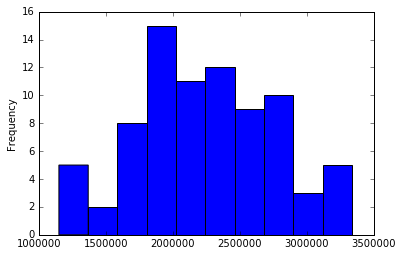

In [481]:
tqs[tqs.index.month == 4].plot.hist()

In [485]:
tmm = ts.resample('1MS', how='sum')

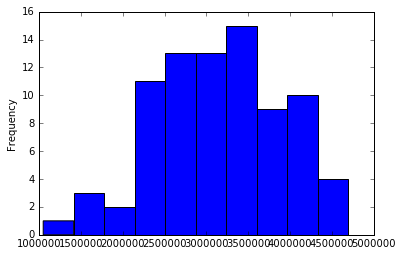

In [487]:
tmm[(tmm.index.month >= 4) & (tmm.index.month <= 8)].resample('AS', how='sum').plot.hist()